In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact

contacts_df = pd.read_csv('/content/Contacts.csv')
intros_df = pd.read_csv('/content/Intros.csv')

In [ ]:
#Creating copy of dataframes to perform analysis. No change to original.
contacts_df1 = contacts_df.copy()
intros_df1 = intros_df.copy()

In [ ]:
contacts_df1.shape, intros_df1.shape

((1345, 71), (1257, 47))

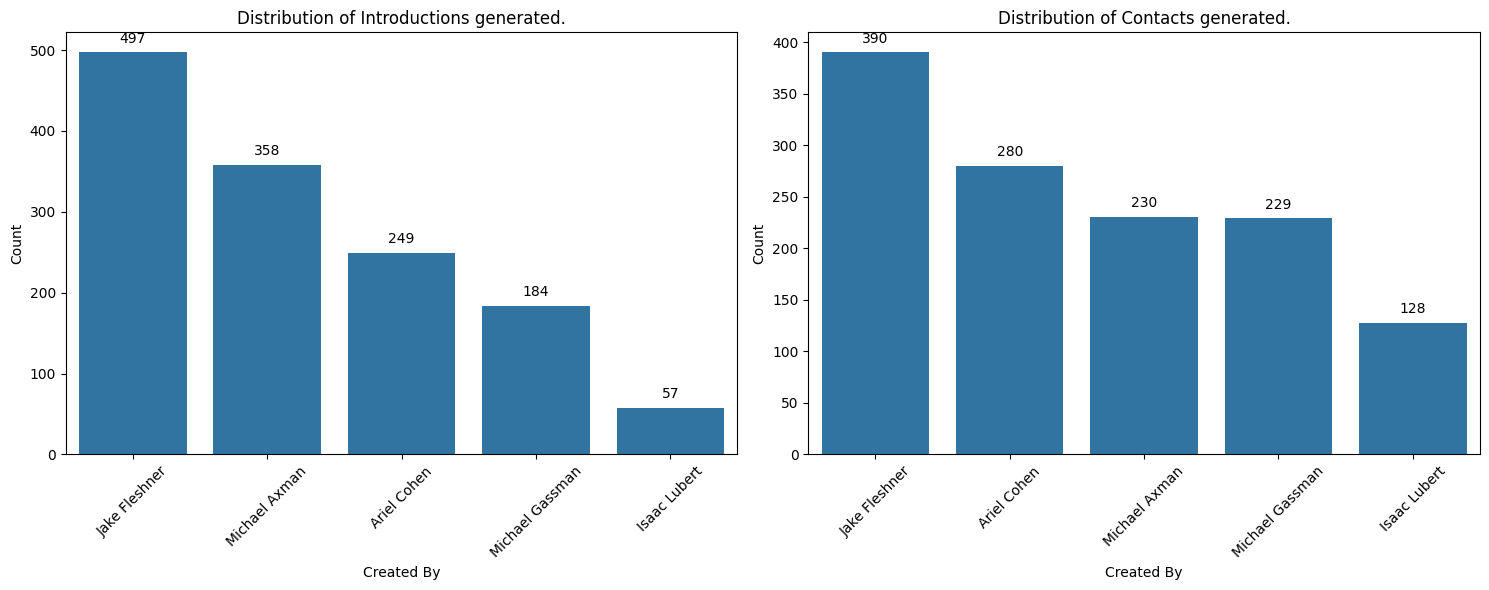

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Created By', data=contacts_df1, order=contacts_df1['Created By'].value_counts().index, ax=ax1)
ax1.set_title('Distribution of Introductions generated.')
ax1.set_xlabel('Created By')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(x='Created By', data=intros_df1, order=intros_df1['Created By'].value_counts().index, ax=ax2)
ax2.set_title('Distribution of Contacts generated.')
ax2.set_xlabel('Created By')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

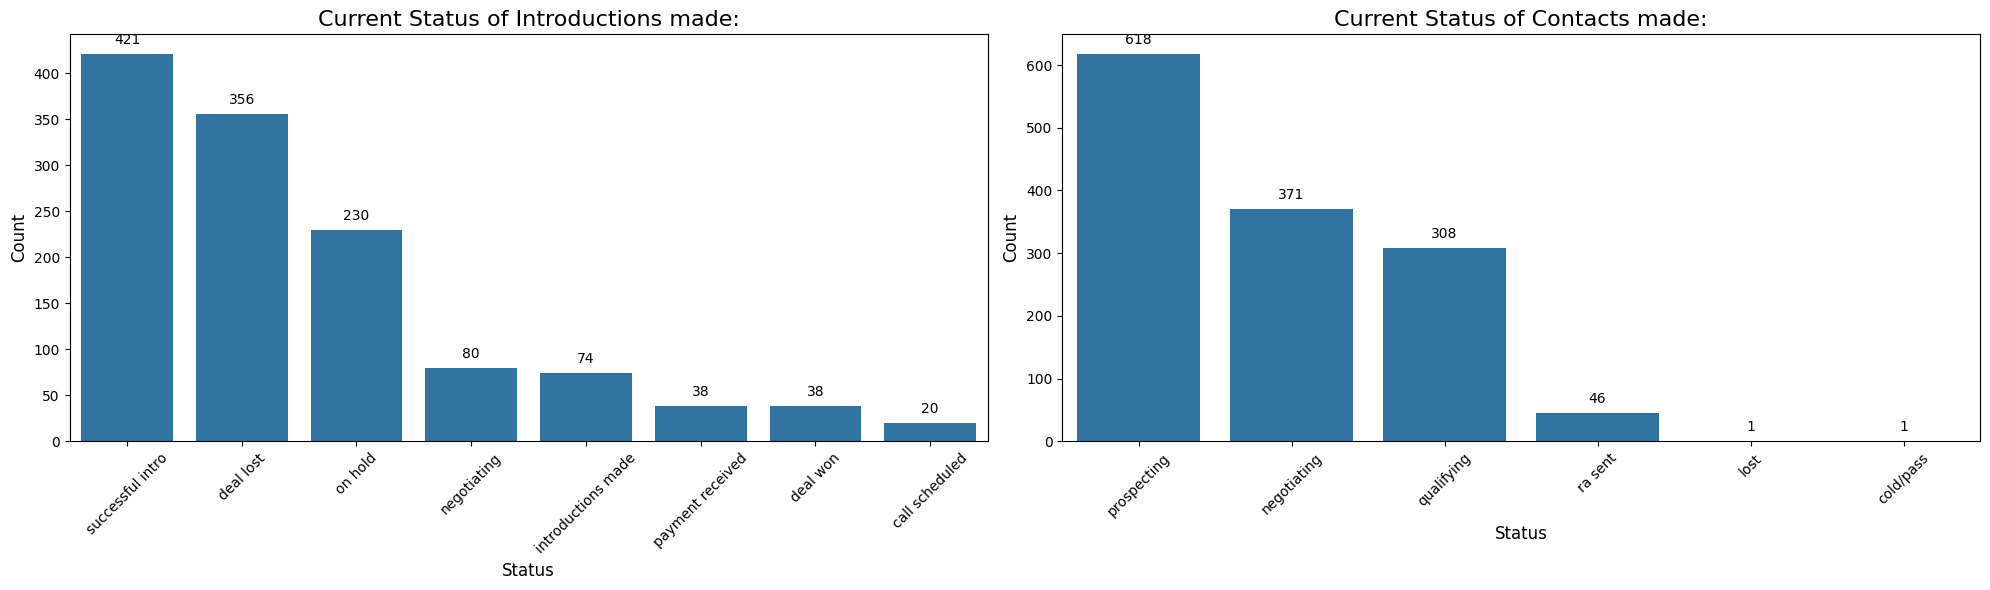

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.countplot(x='Status', data=intros_df1, order=intros_df1['Status'].value_counts().index, ax=ax1)
ax1.set_title('Current Status of Introductions made:', fontsize=16)
ax1.set_xlabel('Status', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10), textcoords='offset points')

sns.countplot(x='Status', data=contacts_df1, order=contacts_df1['Status'].value_counts().index, ax=ax2)
ax2.set_title('Current Status of Contacts made:', fontsize=16)
ax2.set_xlabel('Status', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

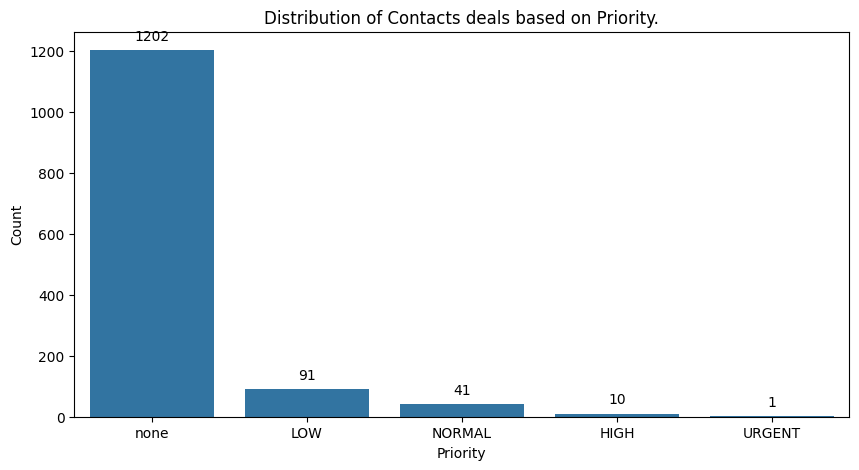

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Priority', data=contacts_df1, order=contacts_df1['Priority'].value_counts().index)
plt.title('Distribution of Contacts deals based on Priority.')
plt.xlabel('Priority')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

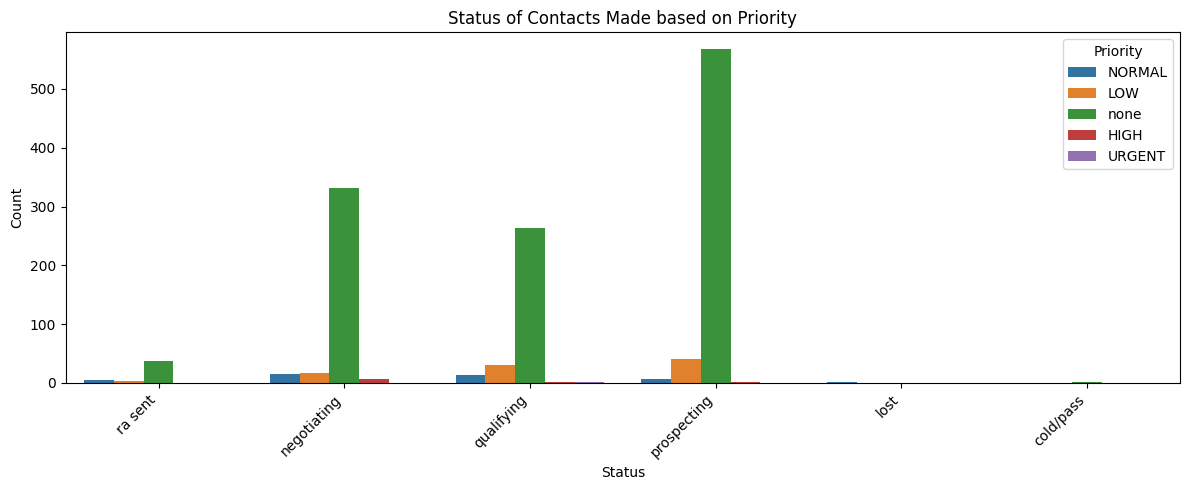


Counts Table:



Priority,HIGH,LOW,NORMAL,URGENT,none
Status,,,,,
cold/pass,0,0,0,0,1
lost,0,0,1,0,0
negotiating,7,17,15,0,332
prospecting,2,41,7,0,568
qualifying,1,30,13,1,263
ra sent,0,3,5,0,38


In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Status', hue='Priority', data=contacts_df1)
plt.title('Status of Contacts Made based on Priority')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Priority', loc='upper right')
plt.tight_layout()
plt.show()

counts_table = pd.crosstab(contacts_df1['Status'], contacts_df1['Priority'])
print("\nCounts Table:\n")
display(counts_table)

Minimum Time In Status: 2.0
Maximum Time In Status: 8050.0


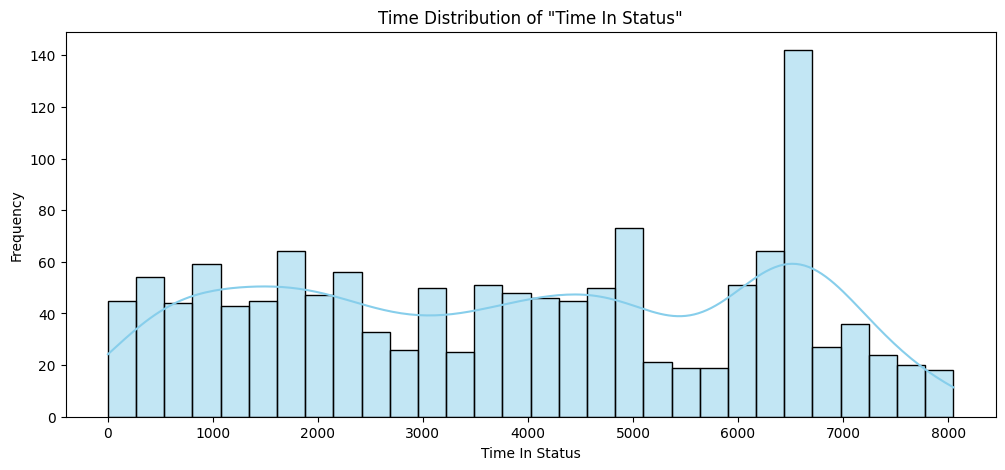

In [ ]:
contacts_df1['Time In Status'] = contacts_df1['Time In Status'].str.replace(' hours', '').astype(float)
time_in_status_cleaned = contacts_df1['Time In Status'].dropna()

min_time = time_in_status_cleaned.min()
max_time = time_in_status_cleaned.max()
print(f"Minimum Time In Status: {min_time}")
print(f"Maximum Time In Status: {max_time}")
plt.figure(figsize=(12, 5))
sns.histplot(time_in_status_cleaned, bins=30, kde=True, color='skyblue', binrange=(min_time, max_time))
plt.title('Time Distribution of "Time In Status"')
plt.xlabel('Time In Status')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-2a6c870a3ce3>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='TOTAL DEAL VALUE (currency)', y='Our Cut (currency)', data=intros_df1, sizes=(20, 200), palette='coolwarm')


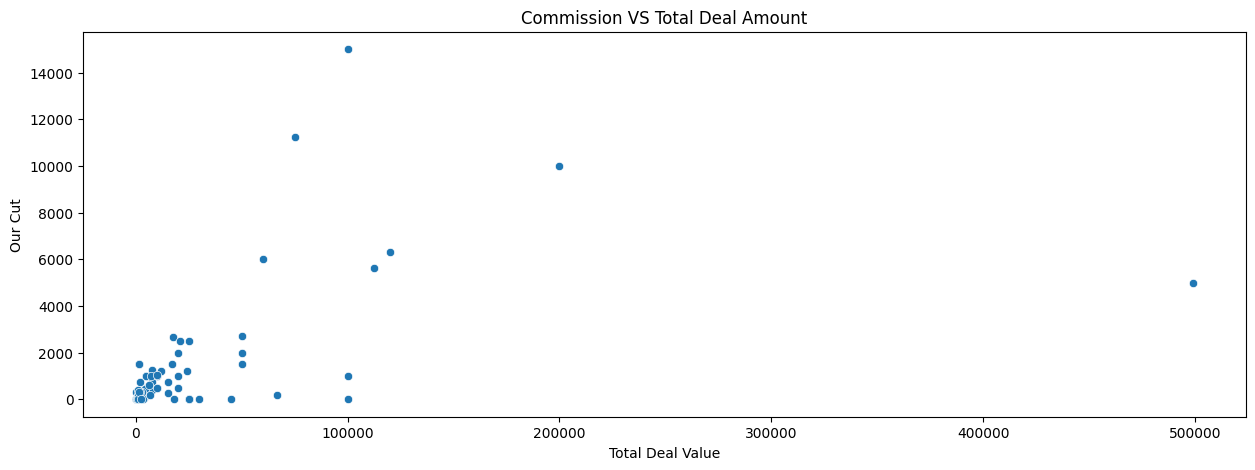

In [ ]:
intros_df1['Cut Percent'] = intros_df1['Our Cut (currency)'] / intros_df1['TOTAL DEAL VALUE (currency)'] * 10
intros_df1['Cut Percent'] = intros_df1['Cut Percent'].round(2)
#hue='Cut Percent', size='Cut Percent', size='Cut Percent'
plt.figure(figsize=(15, 5))
sns.scatterplot(x='TOTAL DEAL VALUE (currency)', y='Our Cut (currency)', data=intros_df1, sizes=(20, 200), palette='coolwarm')
plt.title('Commission VS Total Deal Amount')
plt.xlabel('Total Deal Value')
plt.ylabel('Our Cut')
plt.show()

In [ ]:
all_industries = []
for industries in contacts_df1['Industry (labels)']:
    if isinstance(industries, str):
        all_industries.extend(industries.strip('[]').split(', '))

industry_counts = pd.Series(all_industries).value_counts()


industry_dropdown = widgets.Dropdown(
    options=industry_counts.index.tolist(),
    description='Industry:')

output = widgets.Output()

def display_industry_percentage(selected_industry):
    total_contacts = len(contacts_df1)
    filtered_df = contacts_df1[contacts_df1['Industry (labels)'].str.contains(selected_industry, na=False)]
    num_contacts_in_industry = len(filtered_df)

    if total_contacts > 0:
        percentage = (num_contacts_in_industry / total_contacts) * 100
    else:
        percentage = 0

    with output:
        print(f"{percentage:.2f}% of all contacts made which totals to {num_contacts_in_industry} are from '{selected_industry}' industry.")

def update_percentage(change):
    with output:
        #clear_output(wait=True)
        selected_industry = industry_dropdown.value
        display_industry_percentage(selected_industry)

industry_dropdown.observe(update_percentage, names='value')
display(industry_dropdown, output)

Dropdown(description='Industry:', options=('Venture Capital', 'Tech', 'Real Estate', 'Entertainment', 'Finance…

Output()

In [ ]:
all_industries = []
for industries in contacts_df1['Industry (labels)']:
    if isinstance(industries, str):
        all_industries.extend(industries.strip('[]').split(', '))

industry_counts = pd.Series(all_industries).value_counts()

industry_dropdown = widgets.Dropdown(
    options=industry_counts.index.tolist(),
    description='Industry:')

output = widgets.Output()

def update_plot(change):
    with output:
        clear_output(wait=True)
        selected_industry = change.new
        filtered_df = contacts_df1[contacts_df1['Industry (labels)'].str.contains(selected_industry, na=False)]
        plt.figure(figsize=(10, 4))
        ax = sns.countplot(x='Status', data=filtered_df, order=filtered_df['Status'].value_counts().index)
        plt.title(f'Distribution of Contact Statuses for {selected_industry}', fontsize=16)
        plt.xlabel('Status', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        for p in ax.patches:
           ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                       va='center', xytext=(0, 10), textcoords='offset points')
        plt.tight_layout()
        plt.show()

industry_dropdown.observe(update_plot, names='value')
display(industry_dropdown, output)

Dropdown(description='Industry:', options=('Venture Capital', 'Tech', 'Real Estate', 'Entertainment', 'Finance…

Output()

In [ ]:
all_biz_needs = []
for needs in contacts_df1['Business Need (labels)']:
    if isinstance(needs, str):
        all_biz_needs.extend(needs.strip('[]').split(', '))

all_biz_offerings = []
for offerings in contacts_df1['Business Offering (labels)']:
    if isinstance(offerings, str):
        all_biz_offerings.extend(offerings.strip('[]').split(', '))

biz_needs_counts = pd.Series(all_biz_needs).value_counts()
biz_offerings_counts = pd.Series(all_biz_offerings).value_counts()
unique_biz_needs = biz_needs_counts.index.tolist()
unique_biz_offerings = biz_offerings_counts.index.tolist()

biz_needs_dropdown = widgets.Dropdown(
    options=unique_biz_needs,
    value=unique_biz_needs[0],
    description='Business Need:',
)
biz_offerings_dropdown = widgets.Dropdown(
    options=unique_biz_offerings,
    value=unique_biz_offerings[0],
    description='Business Offering:',
)

needs_offerings_crosstab = pd.crosstab(
    pd.Series(all_biz_needs, name='Business Need'),
    pd.Series(all_biz_offerings, name='Business Offering')
)

def update_heatmap(selected_need, selected_offering):
    filtered_crosstab = needs_offerings_crosstab.copy()

    if selected_need:
        filtered_crosstab = filtered_crosstab.loc[[selected_need]]

    if selected_offering:
        filtered_crosstab = filtered_crosstab[[selected_offering]]

    plt.figure(figsize=(8, 3))
    sns.heatmap(filtered_crosstab, annot=True, cmap='plasma', fmt='d')
    plt.title('Heatmap of Business Needs vs Business Offerings')
    plt.xlabel('Business Offering')
    plt.ylabel('Business Need')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

interact(update_heatmap, selected_need=biz_needs_dropdown, selected_offering=biz_offerings_dropdown)

interactive(children=(Dropdown(description='Business Need:', options=('Deal Flow', 'Startups', 'New Clients', …

<function __main__.update_heatmap(selected_need, selected_offering)>

In [ ]:
!pip install us
import us

contacts_df1['State'] = contacts_df1['Location (location)'].str.extract(r', (\w\w)')
usa_state_counts = contacts_df1['State'][contacts_df1['State'].isin(us.states.mapping('abbr', 'name'))].value_counts()

if not usa_state_counts.empty:
  top_usa_state_abbr = usa_state_counts.index[0]
  top_usa_state_full = us.states.lookup(top_usa_state_abbr).name
  print("USA State with highest count:", top_usa_state_full, "(" + top_usa_state_abbr + ")", " - Count:", usa_state_counts.iloc[0])
  print("\nCounts for all USA states:")
  for state_abbr, count in usa_state_counts.items():
      state_full = us.states.lookup(state_abbr).name
      print(f"{state_full} ({state_abbr}): {count}")

USA State with highest count: California (CA)  - Count: 340

Counts for all USA states:
California (CA): 340
New York (NY): 298
Florida (FL): 74
Illinois (IL): 31
Nevada (NV): 31
Texas (TX): 24
Arizona (AZ): 11
Tennessee (TN): 11
Pennsylvania (PA): 10
Georgia (GA): 9
Colorado (CO): 7
Washington (WA): 6
New Jersey (NJ): 6
Ohio (OH): 4
Utah (UT): 4
Massachusetts (MA): 4
Michigan (MI): 4
Missouri (MO): 3
Idaho (ID): 3
Wisconsin (WI): 2
Indiana (IN): 2
Connecticut (CT): 2
Wyoming (WY): 1
Oregon (OR): 1
Virginia (VA): 1
Oklahoma (OK): 1
North Carolina (NC): 1
Maryland (MD): 1
South Carolina (SC): 1


In [ ]:
all_industries = []
for industries in contacts_df1['Industry (labels)']:
    if isinstance(industries, str):
        all_industries.extend(industries.strip('[]').split(', '))

industry_counts = pd.Series(all_industries).value_counts()

industry_dropdown = widgets.Dropdown(
    options=industry_counts.index.tolist(),
    description='Industry:')

unique_states = contacts_df1['State'][contacts_df1['State'].isin(us.states.mapping('abbr', 'name'))].dropna().unique()
state_dropdown = widgets.Dropdown(
    options=unique_states,
    value=unique_states[0],
    description='State:')

output = widgets.Output()

def update_heatmap(change):
    with output:
        clear_output(wait=True)
        selected_industry = industry_dropdown.value
        selected_state = state_dropdown.value
        filtered_df = contacts_df1[
            (contacts_df1['Industry (labels)'].str.contains(selected_industry, na=False)) &
            (contacts_df1['State'] == selected_state)]

        crosstab = pd.crosstab(filtered_df['Industry (labels)'], filtered_df['State'])

        plt.figure(figsize=(10, 4))
        sns.heatmap(crosstab, annot=True, cmap="YlGnBu")
        plt.title(f"Distribution of '{selected_industry}' in '{selected_state}'")
        plt.xlabel("State")
        plt.ylabel("Industry")
        plt.show()

        total_count = filtered_df.shape[0]
        print(f"Total count of '{selected_industry}' industry in '{selected_state}' state: {total_count}")

industry_dropdown.observe(update_heatmap, names='value')
state_dropdown.observe(update_heatmap, names='value')
display(industry_dropdown, state_dropdown, output)

Dropdown(description='Industry:', options=('Venture Capital', 'Tech', 'Real Estate', 'Entertainment', 'Finance…

Dropdown(description='State:', options=('CA', 'NY', 'TX', 'IL', 'CO', 'NV', 'AZ', 'FL', 'ID', 'TN', 'VA', 'MO'…

Output()

<Figure size 1000x400 with 0 Axes>

In [ ]:
all_industries = []
for industries in contacts_df1['Industry (labels)']:
    if isinstance(industries, str):
        all_industries.extend(industries.strip('[]').split(', '))

industry_counts = pd.Series(all_industries).value_counts()

industry_dropdown = widgets.Dropdown(
    options=industry_counts.index.tolist(),
    description='Industry:')

unique_states = contacts_df1['State'][contacts_df1['State'].isin(us.states.mapping('abbr', 'name'))].dropna().unique()
state_dropdown = widgets.Dropdown(
    options=unique_states,
    value=unique_states[0],
    description='State:')

output = widgets.Output()

def update_table(change):
    with output:
        clear_output(wait=True)
        selected_industry = industry_dropdown.value
        selected_state = state_dropdown.value
        filtered_df = contacts_df1[
            (contacts_df1['Industry (labels)'].str.contains(selected_industry, na=False)) &
            (contacts_df1['State'] == selected_state)]

        crosstab = pd.crosstab(filtered_df['Industry (labels)'], filtered_df['State'])
        display(crosstab)

        total_count = filtered_df.shape[0]
        print(f"Total count of '{selected_industry}' industry in '{selected_state}' state: {total_count}")

industry_dropdown.observe(update_table, names='value')
state_dropdown.observe(update_table, names='value')
display(industry_dropdown, state_dropdown, output)

Dropdown(description='Industry:', options=('Venture Capital', 'Tech', 'Real Estate', 'Entertainment', 'Finance…

Dropdown(description='State:', options=('CA', 'NY', 'TX', 'IL', 'CO', 'NV', 'AZ', 'FL', 'ID', 'TN', 'VA', 'MO'…

Output()

In [ ]:
all_industries = []
for industries in contacts_df1['Industry (labels)']:
    if isinstance(industries, str):
        all_industries.extend(industries.strip('[]').split(', '))

industry_counts = pd.Series(all_industries).value_counts()

industry_dropdown = widgets.Dropdown(
    options=industry_counts.index.tolist(),
    description='Industry:')

output = widgets.Output()

def display_industry_details(selected_industry):
    filtered_df = contacts_df1[contacts_df1['Industry (labels)'].str.contains(selected_industry, na=False)]

    if filtered_df.empty:
        with output:
            print(f"No contacts found for the industry: {selected_industry}")
        return

    details_df = filtered_df[['Created By', 'Assignee', 'Status', 'Priority', 'Date Created', 'Time In Status',
                               'Business Need (labels)', 'Business Offering (labels)', 'Client Type (labels)',
                               'Location (location)', 'Source (drop down)']]
    details_df.fillna('n/a', inplace=True)

    with output:
        display(details_df)

def update_details(change):
    with output:
        clear_output(wait=True)
        selected_industry = industry_dropdown.value
        display_industry_details(selected_industry)

industry_dropdown.observe(update_details, names='value')
display(industry_dropdown, output)

Dropdown(description='Industry:', options=('Venture Capital', 'Tech', 'Real Estate', 'Entertainment', 'Finance…

Output()